<a href="https://colab.research.google.com/github/The-DarK-os/MachineLearning-Algorithms/blob/main/SVMs_vs_Linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine
import pandas as pd
from matplotlib.colors import ListedColormap
%matplotlib inline 

In [23]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)

In [24]:
wine_df['Class'] = wine.target

In [25]:
# wine_df = wine_df.sample(frac = 1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [26]:
X = wine_df[['alcohol','hue']].values
y = wine_df['Class'].values
print(X.shape)
print(y.shape)

(178, 2)
(178,)


Text(0, 0.5, 'hue')

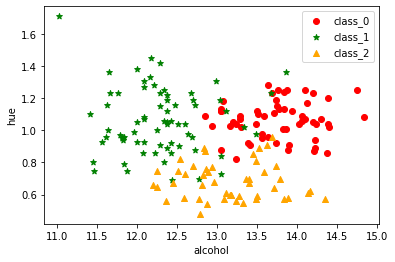

In [36]:
plt.scatter(X[:58,0],X[:58,1],color="red",marker="o",label="class_0")
plt.scatter(X[59:129,0],X[59:129,1],color="green",marker="*",label="class_1")
plt.scatter(X[130:,0],X[130:,1],color="orange",marker="^",label="class_2")
plt.legend(loc="best")
plt.xlabel("alcohol")
plt.ylabel("hue")

In [38]:
def plot_decision_region(X,y,classifier,resolution=0.02):
  markers = ("s","x","o","^","*")
  colors=("red","blue","green","orange","cyan")
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min,x1_max = X[:,0].min()-1 ,X[:,0].max()+1
  x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor="black")
  plt.legend(loc="best")

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)

(124, 2)
(124,)


In [42]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
std.fit(X_test)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

# Logistic Regression

Text(0.5, 1.0, 'Scaled data')

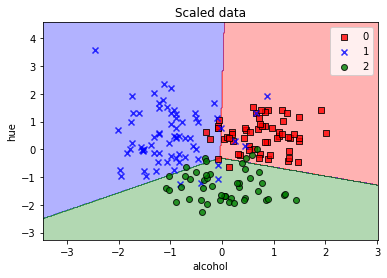

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0,random_state=1,max_iter=100)
lr.fit(X_train_std,y_train)
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(X_combined_std,y_combined,classifier=lr) 
plt.xlabel("alcohol")
plt.ylabel("hue")
plt.title("Scaled data")

Text(0.5, 1.0, 'Original data')

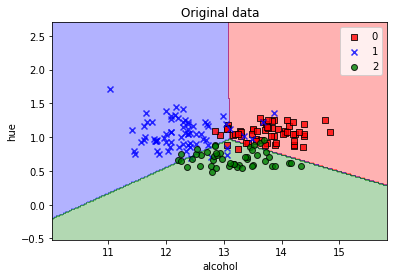

In [44]:
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
lr_1 = LogisticRegression(C=1.0,random_state=1,max_iter=100)
lr_1.fit(X_train,y_train)
plot_decision_region(X_combined,y_combined,classifier=lr_1)
plt.xlabel("alcohol")
plt.ylabel("hue")
plt.title("Original data")

# Support Vector Machines

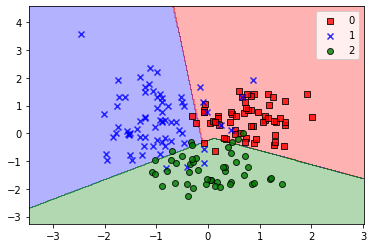

In [55]:
from sklearn.svm import SVC
svm_linear = SVC(C=50.0,kernel="linear",gamma=100.0)
svm_linear.fit(X_train_std,y_train)
plot_decision_region(X_combined_std,y_combined,classifier=svm_linear)

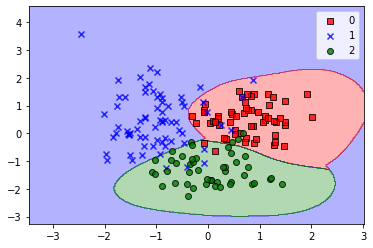

In [62]:
svm_nonlinear = SVC(C=1.0,kernel="rbf",gamma=1.0)
svm_nonlinear.fit(X_train_std,y_train)
plot_decision_region(X_combined_std,y_combined,classifier=svm_nonlinear)

# Evaluation

In [67]:
from sklearn.metrics import classification_report,accuracy_score
pred = lr.predict(X_test_std)
print(classification_report(y_test,pred))
print("Accuracy: ",accuracy_score(y_test,pred))
print("Missclassification: ",(y_test != pred).sum())

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        19
           2       0.83      0.83      0.83        12

    accuracy                           0.93        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.93      0.93      0.93        54

Accuracy:  0.9259259259259259
Missclassification:  4


In [72]:
pred_ = lr_1.predict(X_test)
print(classification_report(y_test,pred_))
print("Accuracy: ",accuracy_score(y_test,pred_))
print("Missclassifications: ",(y_test != pred_).sum())

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       1.00      0.95      0.97        19
           2       0.85      0.92      0.88        12

    accuracy                           0.94        54
   macro avg       0.93      0.94      0.94        54
weighted avg       0.95      0.94      0.95        54

Accuracy:  0.9444444444444444
Missclassifications:  3


In [69]:
pred = svm_linear.predict(X_test_std)
print(classification_report(y_test,pred))
print("Accuracy: ",accuracy_score(y_test,pred))
print("Misclassifications: ",(y_test != pred).sum())

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.89      0.92        19
           2       0.83      0.83      0.83        12

    accuracy                           0.91        54
   macro avg       0.90      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Accuracy:  0.9074074074074074
Misclassifications:  5


In [71]:
pred_1 = svm_nonlinear.predict(X_test_std)
print(classification_report(y_test,pred_1))
print("Accuracy: ",accuracy_score(y_test,pred_1))
print("Missclassifications: ",(y_test != pred_1).sum())

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       1.00      0.95      0.97        19
           2       0.85      0.92      0.88        12

    accuracy                           0.94        54
   macro avg       0.93      0.94      0.94        54
weighted avg       0.95      0.94      0.95        54

Accuracy:  0.9444444444444444
Missclassifications:  3
